<h2 align="center" style="color:blue">Codebasics ML Course: Handling Class Imbalance</h2>

**Dataset credits** UCI Machine Learning Datasets

Downloaded from here: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
df = pd.read_csv("../data/churn.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [10]:
df.Churn.value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

<Axes: xlabel='Churn'>

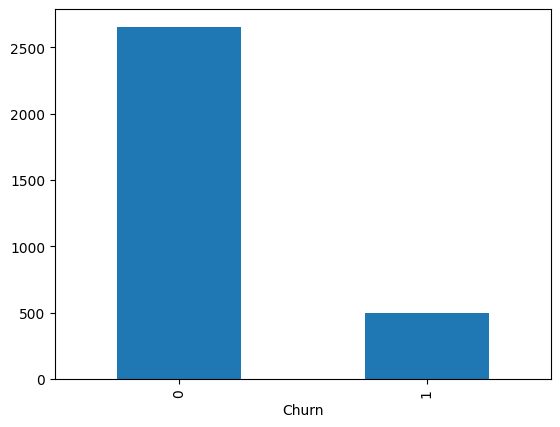

In [11]:
df.Churn.value_counts().plot(kind="bar")

In [12]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [14]:
X = df.drop("Churn",axis="columns")
y = df['Churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       520
           1       0.73      0.43      0.54       110

    accuracy                           0.87       630
   macro avg       0.81      0.70      0.73       630
weighted avg       0.86      0.87      0.86       630



In [18]:
y_train.value_counts()

Churn
0    2135
1     385
Name: count, dtype: int64

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rws = RandomUnderSampler(random_state=42)
X_train_rws, y_train_rws = rws.fit_resample(X_train,y_train)

In [21]:
y_train_rws.value_counts()

Churn
0    385
1    385
Name: count, dtype: int64

In [25]:
model1 = LogisticRegression(max_iter=10000)
model1.fit(X_train_rws,y_train_rws)
y_pred_rws = model1.predict(X_test)

report1 = classification_report(y_test,y_pred_rws)

print(report1)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       520
           1       0.49      0.82      0.62       110

    accuracy                           0.82       630
   macro avg       0.72      0.82      0.75       630
weighted avg       0.87      0.82      0.84       630



In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote , y_train_smote = smote.fit_resample(X_train, y_train)

In [27]:
y_train_smote.value_counts()

Churn
0    2135
1    2135
Name: count, dtype: int64

In [28]:
model2 = LogisticRegression(max_iter=10000)
model2.fit(X_train_smote,y_train_smote)
y_pred_smote = model1.predict(X_test)

report2 = classification_report(y_test,y_pred_smote)

print(report2)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       520
           1       0.49      0.82      0.62       110

    accuracy                           0.82       630
   macro avg       0.72      0.82      0.75       630
weighted avg       0.87      0.82      0.84       630



In [29]:
from imblearn.combine import SMOTETomek

tomek = SMOTETomek(random_state=42)
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train,y_train)
y_train_tomek.value_counts()

Churn
0    2108
1    2108
Name: count, dtype: int64

In [30]:
model3 = LogisticRegression(max_iter=10000)
model3.fit(X_train_tomek,y_train_tomek)
y_pred_tomek = model1.predict(X_test)

report3 = classification_report(y_test,y_pred_smote)

print(report3)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       520
           1       0.49      0.82      0.62       110

    accuracy                           0.82       630
   macro avg       0.72      0.82      0.75       630
weighted avg       0.87      0.82      0.84       630

